In [1]:
import matplotlib.pyplot as plt
def plot_function(f, xmin, xmax, **kwargs):
    ts = np.linspace(xmin, xmax, 1000)
    plt.plot(ts, [f(t) for t in ts], **kwargs)

def plot_sequence(points, max=100, line=False, **kwargs):
    if line:
        plt.plot(range(0, max), points[0:max], **kwargs)
    else:
        plt.scatter(range(0, max), points[0:max], **kwargs)

In [2]:
import pygame, pygame.sndarray

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
pygame.mixer.init(frequency=44100, size=-16, channels=1)

In [4]:
import numpy as np

In [5]:
arr = np.random.randint(-32768, 32767, size=44100, dtype=np.int16)

In [6]:
arr

array([ -2049,  30787,  20447, ...,  22116, -13376, -16016], dtype=int16)

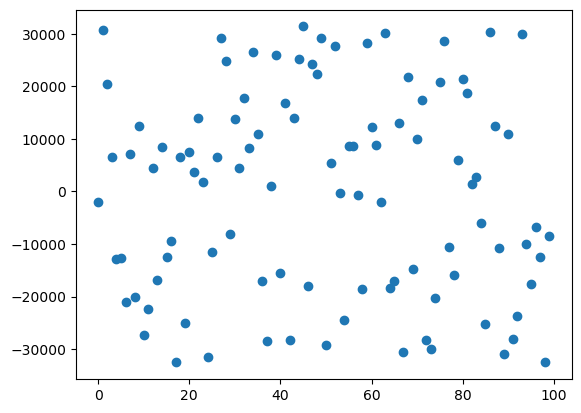

In [7]:
plot_sequence(arr, 100)

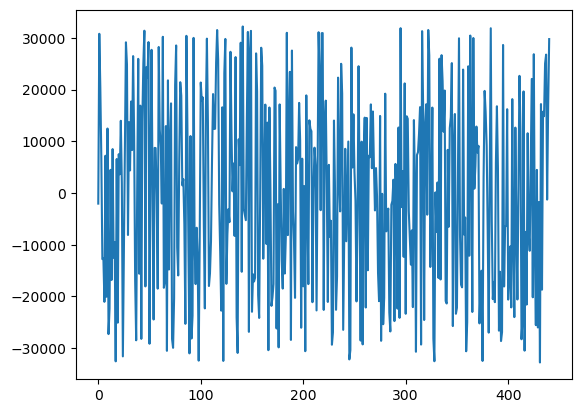

In [8]:
plot_sequence(arr, max=441, line=True)

In [9]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [10]:
form = np.repeat([10000, -10000], 50).astype(np.int16)
# plot_sequence(form)

In [11]:
arr = np.tile(form, 441)

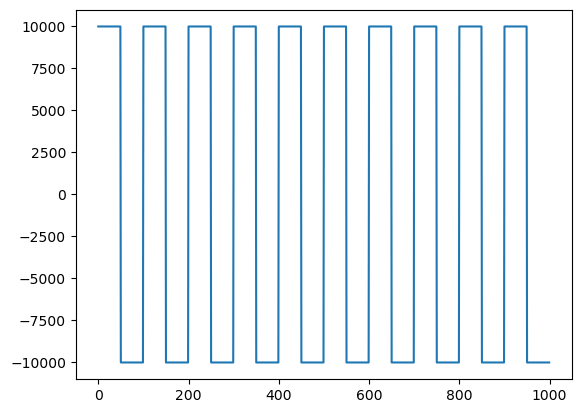

In [12]:
plot_sequence(arr, max=1000, line=True)

In [13]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [14]:
form = np.repeat([10000, -10000], 63).astype(np.int16)
arr = np.tile(form, 350)
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [15]:
from math import sin,pi

def make_sinusoid(frequency, amplitude):
    def f(t):
        return amplitude * sin(2*pi*frequency*t)
    return f

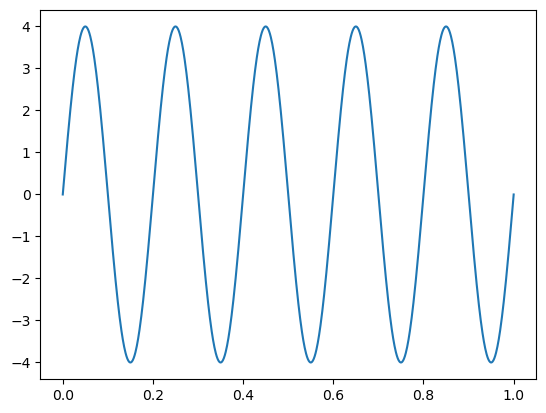

In [16]:
plot_function(make_sinusoid(5,4), 0, 1)

In [17]:
def sample(f, start, end, count):
    mapf = np.vectorize(f)
    ts = np.arange(start, end, 1/count)
    values = mapf(ts)
    return values.astype(np.int16)

In [18]:
sinusoid = make_sinusoid(441, 8000)
arr = sample(sinusoid, 0, 1, 44100)
sound = pygame.sndarray.make_sound(arr)
sound.play()

(-10.0, 10.0)

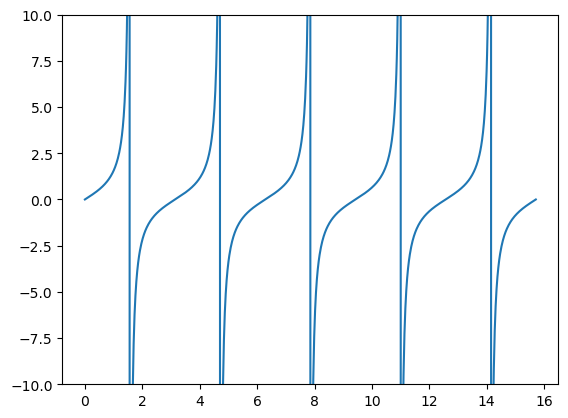

In [19]:
from math import tan
plot_function(tan, 0, 5*pi)
plt.ylim(-10, 10)

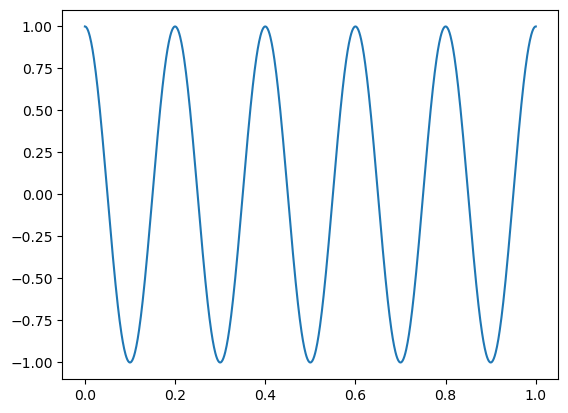

In [20]:
from math import cos

plot_function(lambda t: cos(10*pi*t),0,1)

In [21]:
sample1 = sample(make_sinusoid(441, 8000), 0,1,44100)
sample2 = sample(make_sinusoid(551, 8000), 0,1,44100)

In [22]:
sound1 = pygame.sndarray.make_sound(sample1)
sound2 = pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [23]:
chord = pygame.sndarray.make_sound(sample1+sample2)
chord.play()

In [137]:
from math import sqrt
def const(n):
    return 1

def fourier_series(a0, a, b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n, an) in enumerate(a)]
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n, bn) in enumerate(b)]
        return a0/sqrt(2) + sum(cos_terms) + sum(sin_terms)
    return result

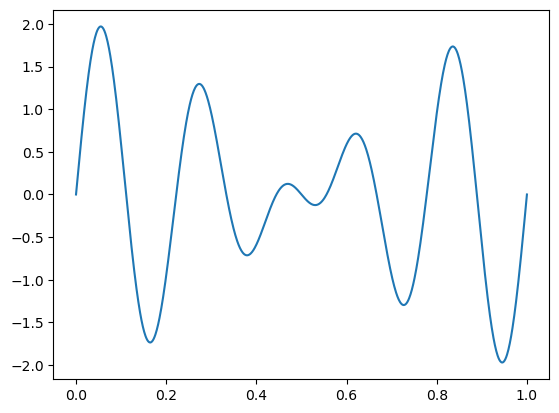

In [25]:
f = fourier_series(0, [0,0,0,0,0], [0,0,0,1,1])
plot_function(f, 0, 1)

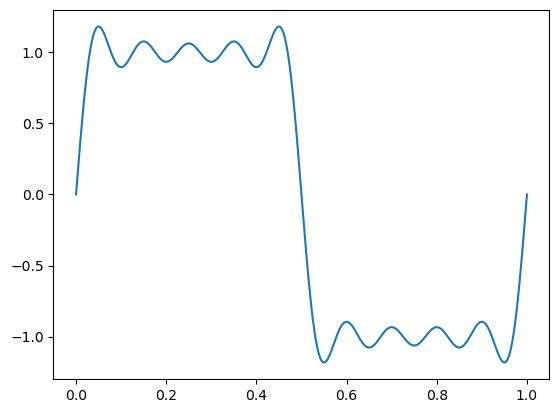

In [26]:
b = [4/(n*pi) if n%2 != 0 else 0 for n in range(1,10)]
f = fourier_series(0, [], b)
plot_function(f, 0, 1)

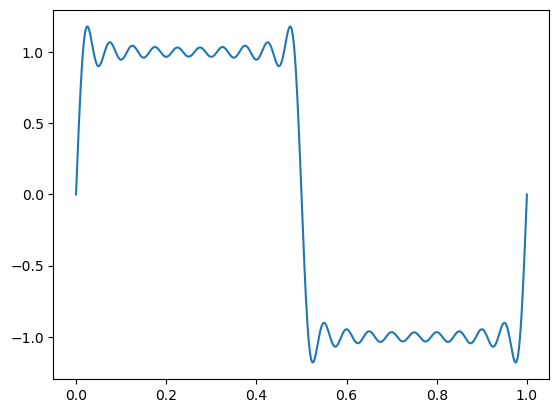

In [27]:
b = [4/(n*pi) if n%2 != 0 else 0 for n in range(1,20)]
f = fourier_series(0, [], b)
plot_function(f, 0, 1)

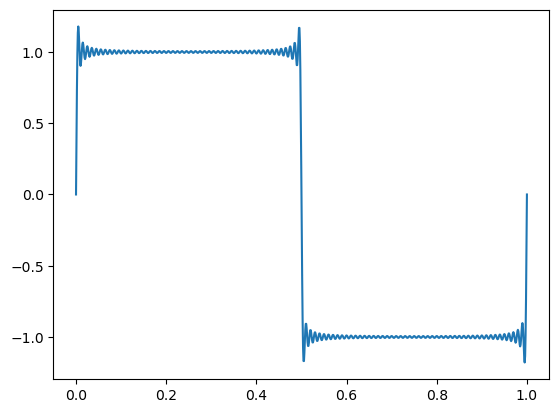

In [60]:
b = [4/(n*pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0, [], b)
plot_function(f, 0, 1)

In [141]:
arr = sample(lambda t: 10000*f(441*t), 0, 1, 44100)
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [71]:
def inner_product(f,g,N=1000):
    dt = 1/N
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)])

In [67]:
def s(n):
    def f(t):
        return sin(2*pi*n*t)
    return f

def c(n):
    def f(t):
        return cos(2*pi*n*t)
    return f

In [79]:
inner_product(c(1), c(1))

1.0

In [91]:
from math import sqrt

inner_product(c(1), const)

-2.1736955982447084e-17

In [93]:
def fourier_coefficients(f, N):
    a0 = inner_product(f, const)
    an = [inner_product(f, c(n)) for n in range(1, N+1)]
    bn = [inner_product(f, s(n)) for n in range(1, N+1)]
    return a0, an, bn

In [95]:
f = fourier_series(0, [2,3,4], [5,6,7])

In [97]:
fourier_coefficients(f, 3)

(-7.741881137904305e-17,
 [1.9999999999999998, 2.9999999999999996, 4.000000000000001],
 [5.0, 6.0, 7.0])

In [99]:
def square(t):
    return 1 if (t%1) < 0.5 else -1

In [101]:
a0, a, b = fourier_coefficients(square, 10)

In [107]:
b[0], 4/pi

(1.2732353559422018, 1.2732395447351628)

In [111]:
b[1], 0

(-1.6263032587282567e-17, 0)

In [113]:
b[2], 4/(3*pi)

(0.42440061513335753, 0.4244131815783876)

In [115]:
def sawtooth(t):
    return t%1

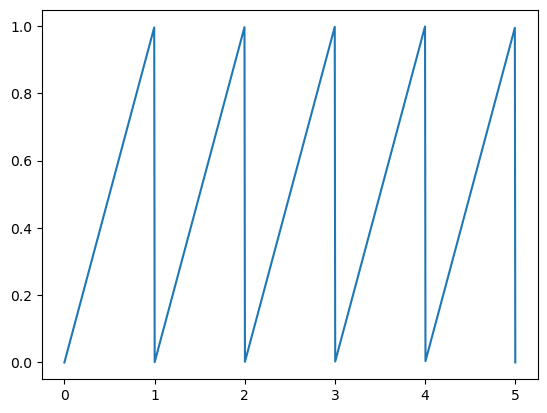

In [119]:
plot_function(sawtooth, 0, 5)

In [121]:
approx = fourier_series(*fourier_coefficients(sawtooth, 10))

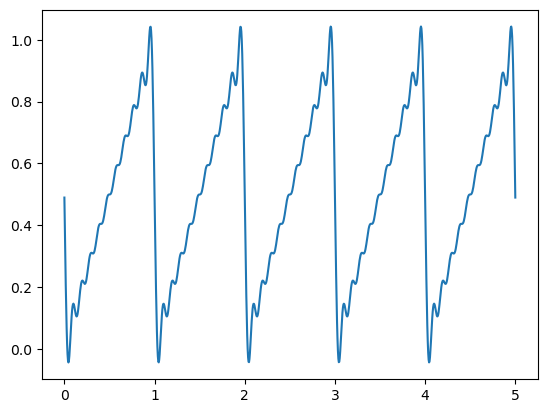

In [123]:
plot_function(approx, 0, 5)

In [125]:
def speedbumps(t):
    if abs(t%1 - 0.5) > 0.25:
        return 0
    else:
        return sqrt(0.25*0.25 - (t%1 - 0.5)**2)

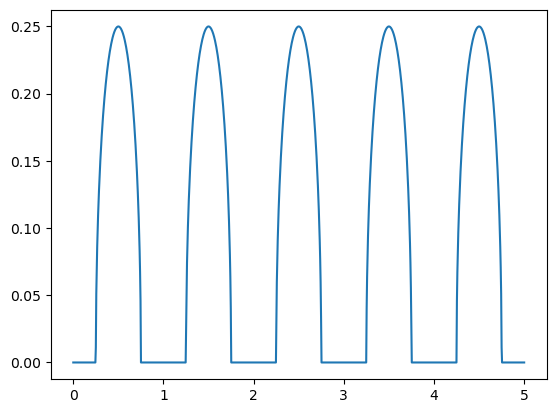

In [129]:
plot_function(speedbumps, 0, 5)

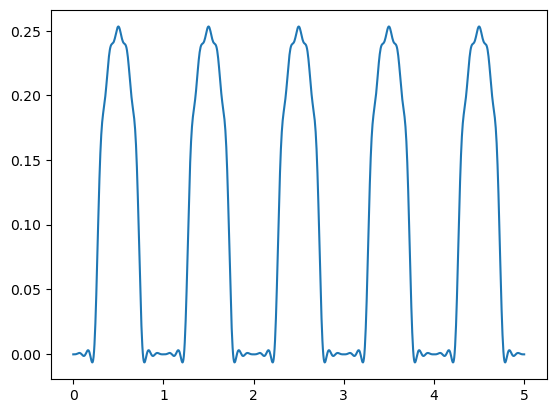

In [135]:
approx = fourier_series(*fourier_coefficients(speedbumps, 10))
plot_function(approx, 0, 5)

In [143]:
def modified_sawtooth(t):
    return 10000*sawtooth(441*t)

arr = sample(modified_sawtooth, 0, 1, 44100)
sound = pygame.sndarray.make_sound(arr)
sound.play()

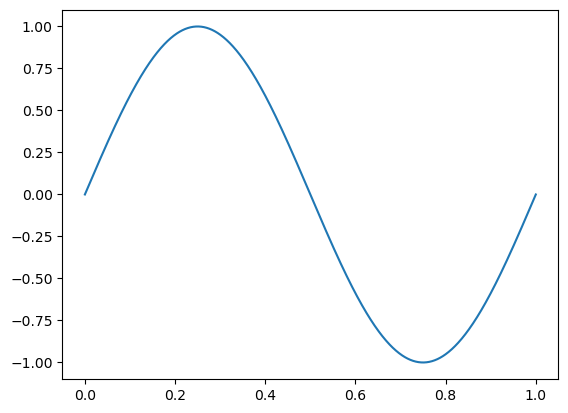

In [145]:
plot_function(lambda t:sin(2*pi*t), 0, 1)